# Coding Assignment 5

Team:

Olivia Dalglish (od4)
Arindam Saha (saha2)

Contribution: Since this was only one problem, we collaborated on the approach and reviewed/cleaned up code together.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
def pegasos(X, y, lambda_reg, n_epochs, seed=42):
    """
    Returns:
    - beta: trained weight vector (n_features,)
    - alpha: trained bias term
    """
    n_samples, n_features = X.shape

    beta = np.zeros(n_features)
    alpha = 0.0
    # iteration counter
    t = 0

    np.random.seed(seed)
    for epoch in range(n_epochs):
        indices = np.random.permutation(n_samples)
        X_shuffled, y_shuffled = X[indices], y[indices]

        for i in range(n_samples):
            t += 1
            learning_rate = 1 / (t * lambda_reg)

            # compute the margin y_i * (x_i @ beta + alpha)
            margin = y_shuffled[i] * (np.dot(X_shuffled[i], beta) + alpha)

            # subgradient updates
            if margin < 1:
                delta_beta = lambda_reg * beta - y_shuffled[i] * X_shuffled[i]
                delta_alpha = -y_shuffled[i]
            else:
                delta_beta = lambda_reg * beta
                delta_alpha = 0.0

            # update beta and alpha
            beta = beta - learning_rate * delta_beta
            alpha = alpha - learning_rate * delta_alpha

    return beta, alpha

def predict(X_test, beta, alpha):
    """
    Returns:
    - predictions: list of predicted labels {5, 6}
    """
    predictions = np.full(len(X_test), 6)

    mask = ((X_test @ beta) + alpha) > 0
    predictions[mask] = 5
    return predictions


In [3]:
train = pd.read_csv("coding5_train.csv")
test = pd.read_csv("coding5_test.csv")

X_train = train.drop(columns=['Y']).to_numpy()
y_train = train['Y'].map({5: 1, 6: -1}).to_numpy()

X_test = test.drop(columns=['Y']).to_numpy()
y_test = test['Y']

n_epochs = 20
lambda_reg = 0.01

beta, alpha = pegasos(X_train, y_train, lambda_reg, n_epochs)

### Predict

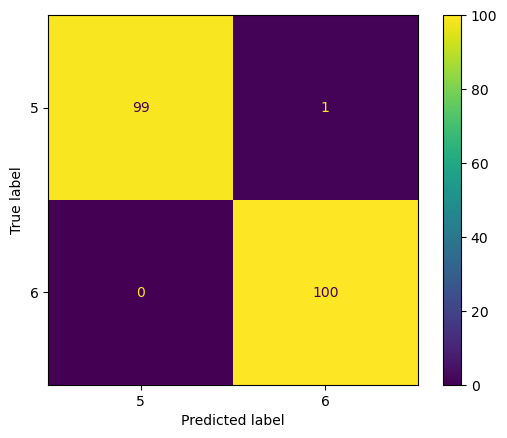

In [4]:
# predict train
y_pred_train = predict(X_train, beta, alpha)
train_confusion = confusion_matrix(train['Y'], y_pred_train, labels=[5, 6])

ConfusionMatrixDisplay(train_confusion, display_labels=[5, 6]).plot()

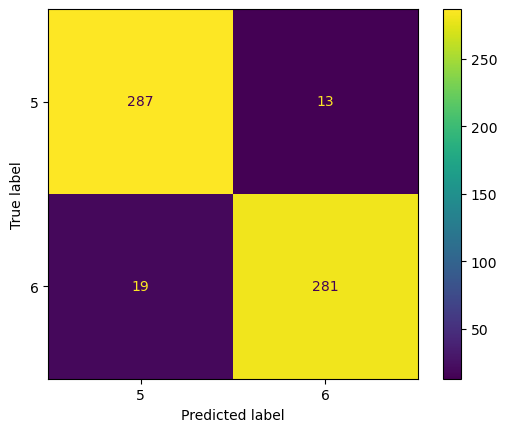

In [5]:
# predict test
y_pred_test = predict(X_test, beta, alpha)
test_confusion = confusion_matrix(y_test, y_pred_test, labels=[5, 6])

ConfusionMatrixDisplay(test_confusion, display_labels=[5, 6]).plot()

### Report error rates

In [6]:
def calculate_error_rate(confusion_matrix):
    total_samples = np.sum(confusion_matrix)
    incorrect_predictions = np.sum(confusion_matrix) - np.trace(confusion_matrix)
    return (incorrect_predictions / total_samples) * 100

In [7]:
train_error = calculate_error_rate(train_confusion)
test_error = calculate_error_rate(test_confusion)

In [8]:
print(f"Train error rate {train_error:0.2f}%")
print(f"Test error rate {test_error:0.2f}%")

Train error rate 0.50%
Test error rate 5.33%
